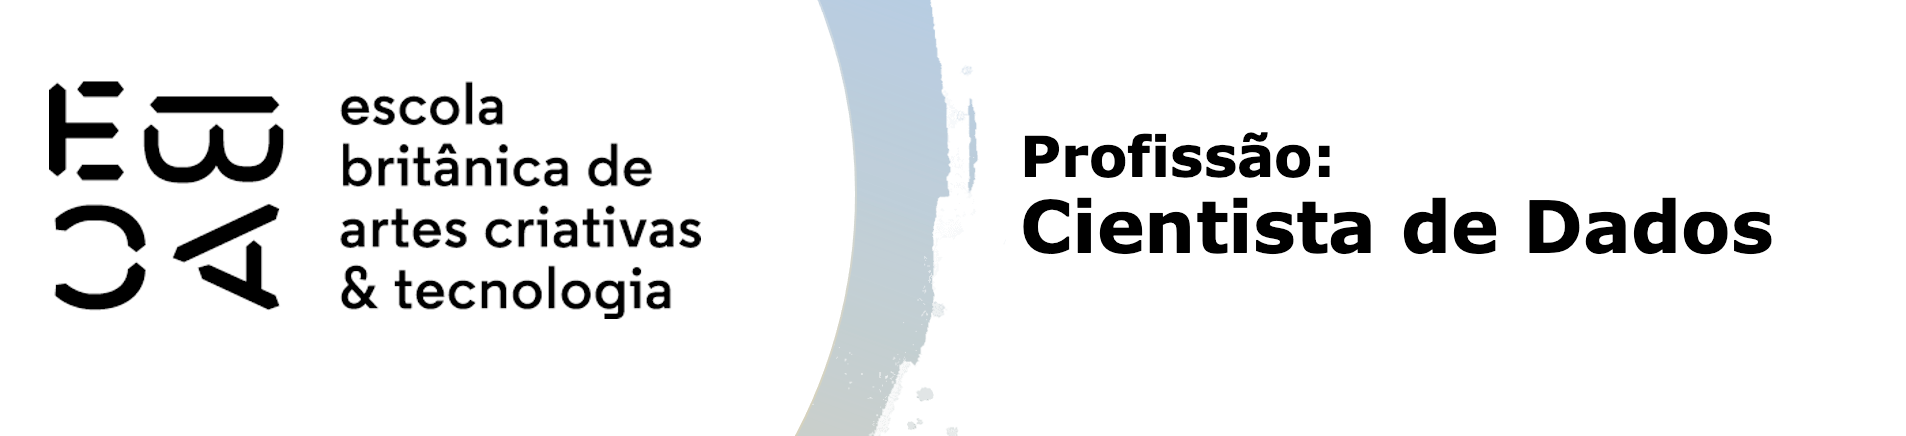

# Projeto: Previsão de Renda

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./Dados/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [5]:
# Substituicao dos Missings pela Media
df.fillna(df[['tempo_emprego']].mean(), inplace=True)

In [6]:
# Resetando o índice para transformar `data_ref` em coluna
df.reset_index(inplace=True)

# Convertendo a coluna de data to datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Ordenaçao dos dados pela data 
df = df.sort_values(by='data_ref')
df['data_ref'].value_counts()

data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

In [7]:
# Base teste (dividindo a base teste em ultimos 3 meses)
df_test = df[df['data_ref'] >= '2016-01-01'] 

# Base treino (todos exceto ultimos 3 meses)
df_train = df[df['data_ref'] < '2016-01-01']

In [8]:
y_train = np.log(df_train['renda'])
y_test = np.log(df_test['renda'])

X_train = df_train.drop(columns=['renda', 'index', 'data_ref'])
X_test = df_test.drop(columns=['renda', 'index', 'data_ref'])

In [9]:
# Transformando as variaveis categoricas em numericas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Convertendo colunas booleanas para inteiros (0 e 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Adicionando a constante (intercepto) ao modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)


In [10]:
# Modelo de Regressao Linear
modelo = sm.OLS(y_train, X_train_const).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.960e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:17:57   Log-Likelihood:            -7.9111e+05
No. Observations:              600000   AIC:                         1.582e+06
Df Residuals:                  599974   BIC:                         1.583e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.4616      0.047    158.063      0.000       7.369       7.554
level_0                        7.995e-07   6.81e-09    117.366      0.000    7.86e-07    8.13e-07
qtd_filhos                       -0.1555      0.022     -6.994      0.000      -0.199      -0.112
idade                             0.0041      0.000     26.646      0.000       0.004       0.004
tempo_emprego                     0.1287      0.000    626.019      0.000       0.128       0.129
qt_pessoas_residencia             0.1618      0.022      7.292      0.000       0.118       0.205
sexo_M                            0.1329      0.003     48.167      0.000       0.127       0.138
posse_de_veiculo_S                0.0119      0.003      4.536      0.000       0.007       0.017
posse_de_imovel_S                 0.1852      0.003     72.149      0.000       0.180       0.190
tipo_renda_Bolsista              -0.1708      0.052     -3.290      0.001      -0.272      -0.069
tipo_renda_Empresário             0.1515      0.003     51.163      0.000       0.146       0.157
tipo_renda_Pensionista           -0.2651      0.004    -62.648      0.000      -0.273      -0.257
tipo_renda_Servidor público       0.1440      0.004     33.042      0.000       0.135       0.153
educacao_Médio                    0.0406      0.011      3.665      0.000       0.019       0.062
educacao_Pós graduação            0.1547      0.038      4.101      0.000       0.081       0.229
educacao_Superior completo        0.0875      0.011      7.814      0.000       0.066       0.109
educacao_Superior incompleto      0.0348      0.013      2.776      0.006       0.010       0.059
estado_civil_Separado             0.1884      0.023      8.275      0.000       0.144       0.233
estado_civil_Solteiro             0.1692      0.022      7.578      0.000       0.125       0.213
estado_civil_União                0.0114      0.004      2.545      0.011       0.003       0.020
estado_civil_Viúvo                0.1675      0.023      7.278      0.000       0.122       0.213
tipo_residencia_Casa             -0.0913      0.010     -9.060      0.000      -0.111      -0.072
tipo_residencia_Com os pais      -0.0585      0.011     -5.120      0.000      -0.081      -0.036
tipo_residencia_Comunitário      -0.1311      0.020     -6.448      0.000      -0.171      -0.091
tipo_residencia_Estúdio          -0.1406      0.017     -8.279      0.000      -0.174      -0.107
tipo_residencia_Governamental    -0.1048      0.012     -8.738      0.000      -0.128      -0.081
==============================================================================
Omnibus:                      882.222   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.662
Skew

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

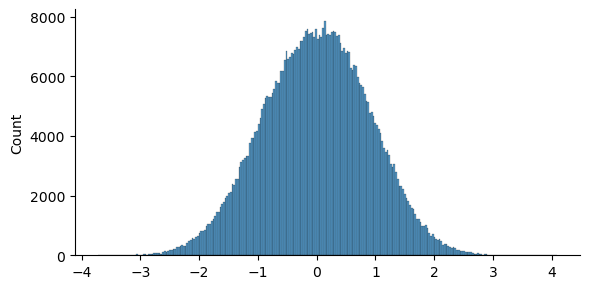

In [12]:
# Distribuicao dos residuos = distribuição Normal
sns.displot(modelo.resid, height=3, aspect=2);

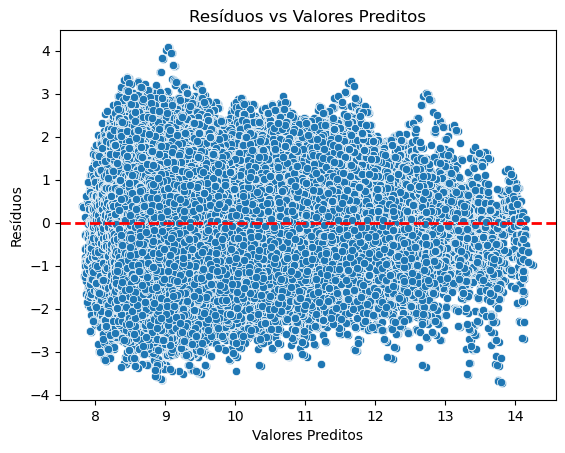

In [13]:
# Independência dos resíduos (resíduos vs valores preditos) - Grafico "Resíduos vs Valores Preditos"
sns.scatterplot(x=modelo.fittedvalues, y=modelo.resid)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Preditos")
plt.show()

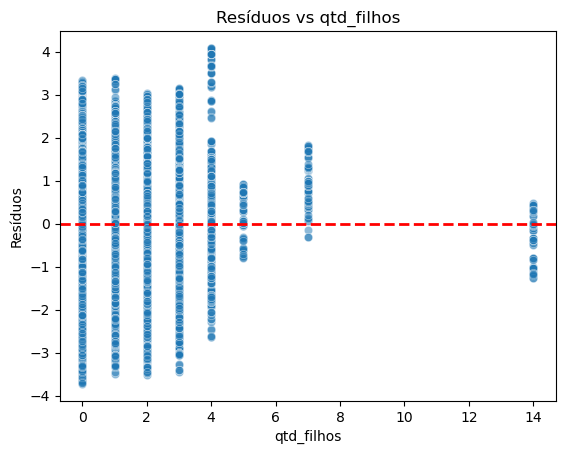

In [14]:
# Padrões dos resíduos vs qtd_filhos
variavel = "qtd_filhos"  

sns.scatterplot(x=df_train[variavel], y=modelo.resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel(variavel)
plt.ylabel("Resíduos")
plt.title(f"Resíduos vs {variavel}")
plt.show()


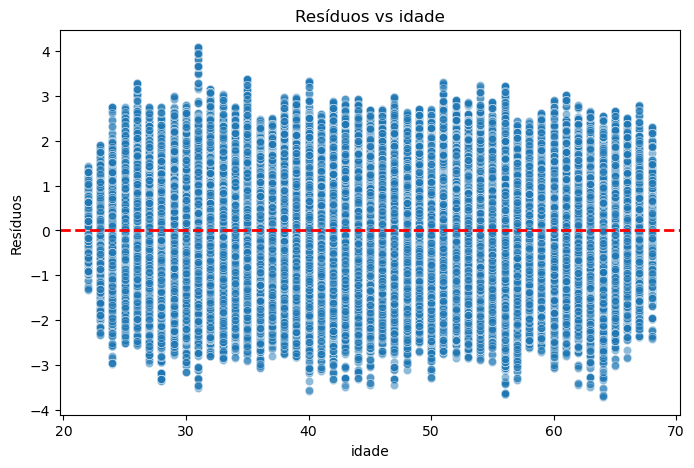

In [15]:
# Padrões dos resíduos vs idade
variavel = "idade"  

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_train[variavel], y=modelo.resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel(variavel)
plt.ylabel("Resíduos")
plt.title(f"Resíduos vs {variavel}")
plt.show()

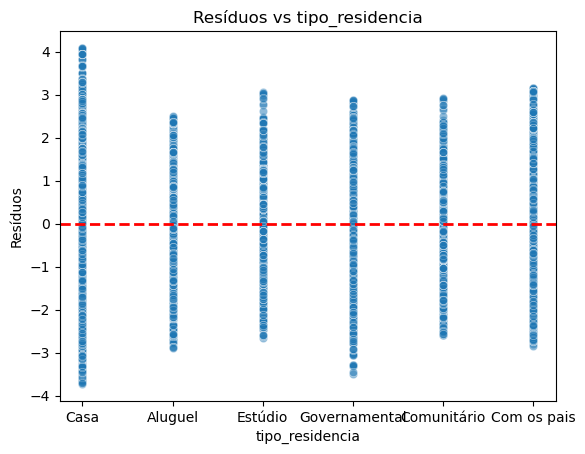

In [16]:
# Padrões dos resíduos vs tipo_residencia
variavel = "tipo_residencia"  

sns.scatterplot(x=df_train[variavel], y=modelo.resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel(variavel)
plt.ylabel("Resíduos")
plt.title(f"Resíduos vs {variavel}")
plt.show()

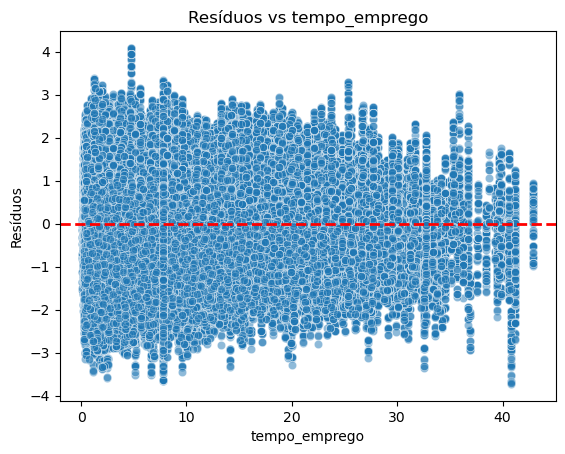

In [17]:
# Padrões dos resíduos vs tempo_emprego
variavel = "tempo_emprego"  

sns.scatterplot(x=df_train[variavel], y=modelo.resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel(variavel)
plt.ylabel("Resíduos")
plt.title(f"Resíduos vs {variavel}")
plt.show()

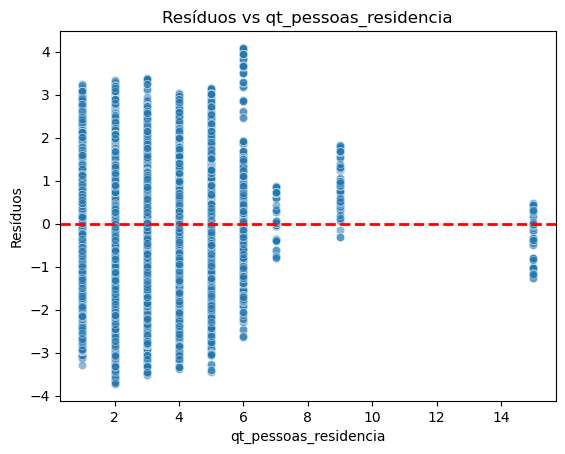

In [18]:
# Padrões dos resíduos vs qt_pessoas_residencia
variavel = "qt_pessoas_residencia"  

sns.scatterplot(x=df_train[variavel], y=modelo.resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel(variavel)
plt.ylabel("Resíduos")
plt.title(f"Resíduos vs {variavel}")
plt.show()

C:\Users\AJWork\AppData\Local\Temp\ipykernel_17004\2787669376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['residuos'] = residuos  # Adicionado resíduos na base de treino


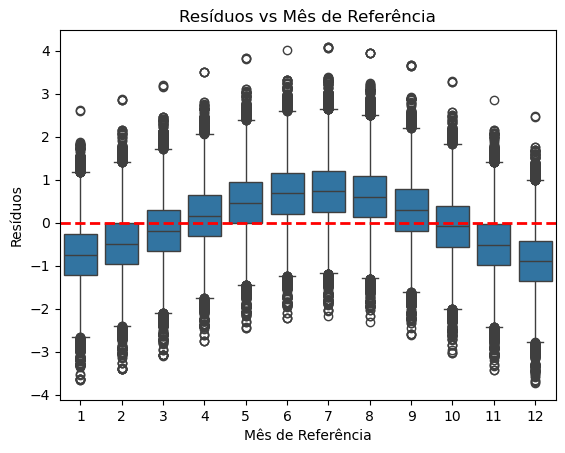

In [19]:
# Avaliar relação dos resíduos com o mês de referência
residuos = modelo.resid
df_train['residuos'] = residuos  # Adicionado resíduos na base de treino

sns.boxplot(x=df_train["data_ref"].dt.month, y=df_train["residuos"])
plt.axhline(0, color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Mês de Referência")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Mês de Referência")
plt.show()


## Análise do Gráfico: Resíduos vs Mês de Referência 

- Os residuos estao mais altos nos meses do ano (Maio a Agosto) e mais baixo no inicio e fim do ano (Novembro a Fevereiro)
- Isso sugere que a variável do tempo pode estar influenciando a renda
- Há presença de outliers em todos os meses

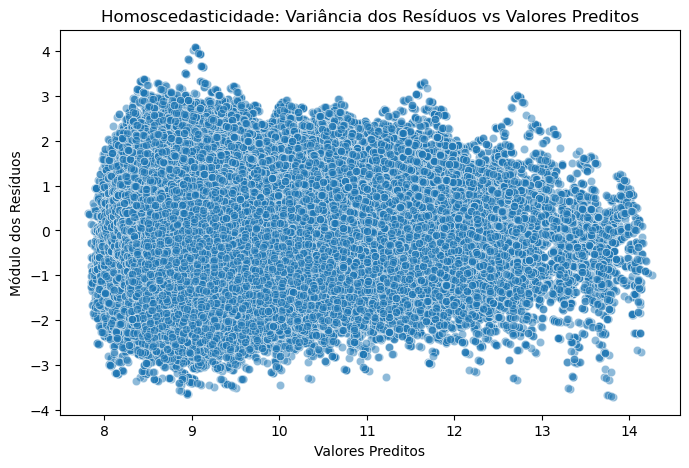

In [21]:
# Avaliaçao da variância dos resíduos ao longo dos valores preditos (homocedasticidade)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=modelo.fittedvalues, y=residuos, alpha=0.5)
plt.xlabel("Valores Preditos")
plt.ylabel("Módulo dos Resíduos")
plt.title("Homoscedasticidade: Variância dos Resíduos vs Valores Preditos")
plt.show()

## Análise do Gráfico: Homocedasticidade - Variância dos Resíduos vs Valores Preditos
- O grafico mostra que os residuos nao sao constantes ao longo dos valores preditos
- Nos valores acima de 13 a dispersao parece diminuir
- Padrão de funil sugere heterocedasticidade pois os residuos ficam mais espalhados conforme aumenta o valor predito

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

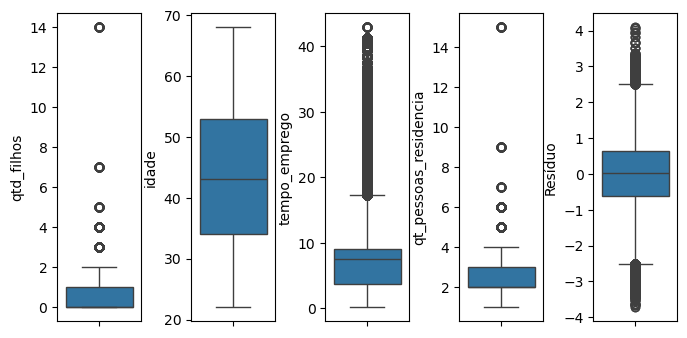

In [24]:
fix, ax = plt.subplots(1, 5, figsize=(8,4))
plt.subplots_adjust(wspace=.6, hspace=0)

sns.boxplot(y = 'qtd_filhos',data=df_train, ax=ax[0])
sns.boxplot(y = 'idade',data=df_train, ax=ax[1])
sns.boxplot(y = 'tempo_emprego',data=df_train, ax=ax[2])
sns.boxplot(y = 'qt_pessoas_residencia',data=df_train, ax=ax[3])
sns.boxplot(y = modelo.resid ,data=df_train, ax=ax[4]);

ax[0].set_ylabel('qtd_filhos')
ax[1].set_ylabel('idade')
ax[2].set_ylabel('tempo_emprego');
ax[3].set_ylabel('qt_pessoas_residencia')
ax[4].set_ylabel('Resíduo');


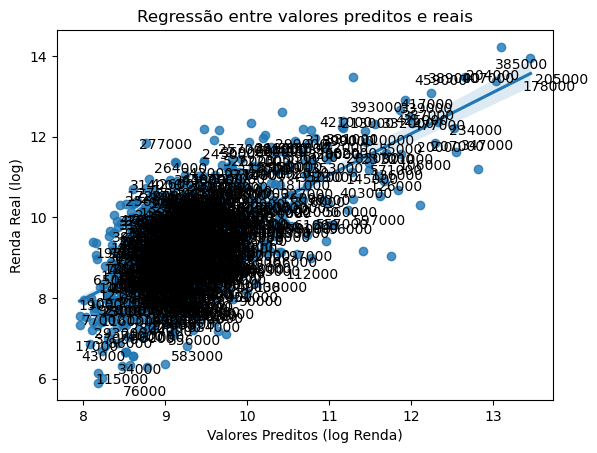

In [25]:
fig, ax = plt.subplots()

amostra = np.random.choice(range(len(y_train)), 1000, replace=False) #amostragem pois dataset é muito grande
sns.regplot(x=modelo.fittedvalues.iloc[amostra], y=y_train.iloc[amostra], ax=ax)

for i in range(0, len(y_train), 1000):  # Anotando apenas alguns pontos para não poluir o gráfico
    ax.annotate(str(i), (modelo.fittedvalues.iloc[i], y_train.iloc[i]))
plt.xlabel("Valores Preditos (log Renda)")
plt.ylabel("Renda Real (log)")
plt.title("Regressão entre valores preditos e reais")
plt.show()

## Grafico de regressao:
- Sugere que em valores mais altos (13, 14 log) a dispersão aumenta indicando outliers influenciando a prediçao
- A concentracao esta entre 9 e 11 log, sugerindo que o modelo tem melhor desempenho para rendas médias e piora nas extremidades

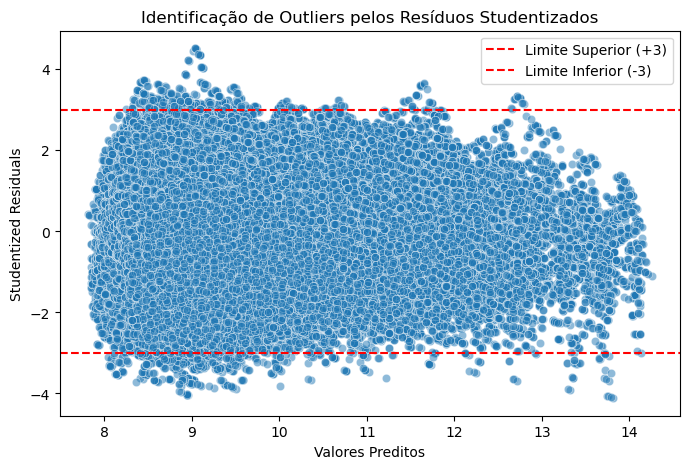

In [27]:
# Obter os resíduos studentizados
st_res = modelo.get_influence().resid_studentized_internal

# Gráfico de dispersão
plt.figure(figsize=(8,5))
sns.scatterplot(x=modelo.fittedvalues, y=st_res, alpha=0.5)
plt.axhline(y=3, color='red', linestyle='--', linewidth=1.5, label="Limite Superior (+3)")
plt.axhline(y=-3, color='red', linestyle='--', linewidth=1.5, label="Limite Inferior (-3)")
plt.xlabel("Valores Preditos")
plt.ylabel("Studentized Residuals")
plt.title("Identificação de Outliers pelos Resíduos Studentizados")
plt.legend()

plt.show()

In [28]:
# Tratamento dos outliers
influencia = modelo.get_influence()
residuos_studentizados = influencia.resid_studentized_internal

# Indice com os pontos dentro da faixa aceitável
indices_validos = (residuos_studentizados > -3) & (residuos_studentizados < 3)

# Filtrar os dados
X_train_limpo = X_train[indices_validos]
y_train_limpo = y_train[indices_validos]

# Reajustar o modelo sem os outliers
modelo_limpo = sm.OLS(y_train_limpo, sm.add_constant(X_train_limpo)).fit()
modelo_limpo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 1.991e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:18:20   Log-Likelihood:            -7.8437e+05
No. Observations:              598925   AIC:                         1.569e+06
Df Residuals:                  598899   BIC:                         1.569e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.4656      0.047    159.546      0.000       7.374       7.557
level_0                        8.042e-07   6.76e-09    118.961      0.000    7.91e-07    8.17e-07
qtd_filhos                       -0.1559      0.022     -7.075      0.000      -0.199      -0.113
idade                             0.0041      0.000     26.870      0.000       0.004       0.004
tempo_emprego                     0.1288      0.000    630.881      0.000       0.128       0.129
qt_pessoas_residencia             0.1611      0.022      7.326      0.000       0.118       0.204
sexo_M                            0.1344      0.003     49.083      0.000       0.129       0.140
posse_de_veiculo_S                0.0124      0.003      4.755      0.000       0.007       0.017
posse_de_imovel_S                 0.1849      0.003     72.623      0.000       0.180       0.190
tipo_renda_Bolsista              -0.1686      0.051     -3.277      0.001      -0.269      -0.068
tipo_renda_Empresário             0.1519      0.003     51.702      0.000       0.146       0.158
tipo_renda_Pensionista           -0.2625      0.004    -62.526      0.000      -0.271      -0.254
tipo_renda_Servidor público       0.1475      0.004     34.108      0.000       0.139       0.156
educacao_Médio                    0.0374      0.011      3.403      0.001       0.016       0.059
educacao_Pós graduação            0.1594      0.037      4.257      0.000       0.086       0.233
educacao_Superior completo        0.0812      0.011      7.310      0.000       0.059       0.103
educacao_Superior incompleto      0.0320      0.012      2.573      0.010       0.008       0.056
estado_civil_Separado             0.1885      0.023      8.356      0.000       0.144       0.233
estado_civil_Solteiro             0.1701      0.022      7.684      0.000       0.127       0.213
estado_civil_União                0.0120      0.004      2.708      0.007       0.003       0.021
estado_civil_Viúvo                0.1666      0.023      7.305      0.000       0.122       0.211
tipo_residencia_Casa             -0.0921      0.010     -9.213      0.000      -0.112      -0.072
tipo_residencia_Com os pais      -0.0626      0.011     -5.533      0.000      -0.085      -0.040
tipo_residencia_Comunitário      -0.1397      0.020     -6.925      0.000      -0.179      -0.100
tipo_residencia_Estúdio          -0.1503      0.017     -8.917      0.000      -0.183      -0.117
tipo_residencia_Governamental    -0.1041      0.012     -8.752      0.000      -0.127      -0.081
==============================================================================
Omnibus:                     2582.465   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1952.980
Skew

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [30]:
# Spearman
df_train_numeric = pd.get_dummies(df_train, drop_first=True)  # Converte categorias em números
df_train_numeric = df_train_numeric.drop(columns=["level_0", "data_ref", "index", "renda", "residuos"], errors="ignore")
df_train_numeric = df_train_numeric.astype(float)

correlacao_spearman = df_train_numeric.corr(method='spearman')
correlacao_spearman

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
qtd_filhos,1.000000,-0.415384,-0.090583,0.828570,0.120078,0.120446,-0.014131,-0.014892,0.037946,-0.266195,...,0.036432,-0.011160,-0.129628,0.011483,-0.110487,-0.044160,0.043227,-0.006156,0.036242,0.003129
idade,-0.415384,1.000000,0.301418,-0.350081,-0.215860,-0.166977,0.130211,0.016165,-0.177659,0.587405,...,-0.154518,0.056969,-0.069436,-0.056865,0.213692,0.155105,-0.190500,-0.018022,-0.007139,0.011479
tempo_emprego,-0.090583,0.301418,1.000000,-0.058691,-0.129333,-0.069092,0.014221,0.024150,-0.126717,0.153416,...,-0.058724,0.001368,-0.046734,-0.021479,0.050179,0.070253,-0.089577,-0.040352,0.024178,0.006985
qt_pessoas_residencia,0.828570,-0.350081,-0.058691,1.000000,0.159741,0.173632,-0.017843,-0.004056,0.026897,-0.239449,...,0.021121,-0.263566,-0.486274,0.093682,-0.305925,-0.021276,0.026129,-0.003548,0.030811,-0.003148
sexo_M,0.120078,-0.215860,-0.129333,0.159741,1.000000,0.367393,-0.055253,-0.015721,0.015977,-0.174898,...,0.018618,-0.063005,-0.034438,-0.024309,-0.138884,-0.062326,0.053830,0.020365,0.053235,-0.021767
posse_de_veiculo_S,0.120446,-0.166977,-0.069092,0.173632,0.367393,1.000000,-0.024731,-0.018019,0.049775,-0.149797,...,0.018191,-0.077259,-0.081666,-0.034452,-0.093329,-0.021338,0.021738,0.027765,0.031416,-0.019159
posse_de_imovel_S,-0.014131,0.130211,0.014221,-0.017843,-0.055253,-0.024731,1.000000,0.015772,-0.015189,0.097016,...,-0.045945,-0.016342,0.004860,-0.033255,0.039119,0.202868,-0.157179,-0.019765,-0.038423,-0.122076
tipo_renda_Bolsista,-0.014892,0.016165,0.024150,-0.004056,-0.015721,-0.018019,0.015772,1.000000,-0.012321,-0.010145,...,-0.004574,-0.005533,-0.008408,-0.006517,-0.004730,0.007569,-0.004862,-0.001494,-0.001930,-0.004060
tipo_renda_Empresário,0.037946,-0.177659,-0.126717,0.026897,0.015977,0.049775,-0.015189,-0.012321,1.000000,-0.245770,...,0.047684,0.008241,0.039485,0.035789,-0.075646,-0.005422,0.013003,-0.021674,0.006015,-0.003937
tipo_renda_Pensionista,-0.266195,0.587405,0.153416,-0.239449,-0.174898,-0.149797,0.097016,-0.010145,-0.245770,1.000000,...,-0.066928,-0.012833,-0.017450,-0.027499,0.205019,0.091953,-0.095397,-0.029808,-0.010710,-0.007132


In [31]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_train_numeric, i) for i in range(df_train_numeric.shape[1])]
vars_vif["Feature"] = df_train_numeric.columns

vars_vif.round(2)

,VIF Factor,Feature
0,34.58,qtd_filhos
1,34.68,idade
2,3.02,tempo_emprego
3,241.89,qt_pessoas_residencia
4,1.82,sexo_M
5,1.97,posse_de_veiculo_S
6,3.24,posse_de_imovel_S
7,1.00,tipo_renda_Bolsista
8,1.48,tipo_renda_Empresário
9,2.20,tipo_renda_Pensionista


## Resultados:
- VIF < 5 = Multicolinearidade Baixa
- VIF entre 5 e 10 = Multicolinearidade Media
- VIF > 10 = Multicolinearidade Alta
    - As seguintes variaveis tem VIF muito alto:
        - qtd_filhos: 34.58
        - idade: 34.68
        - qt_pessoas_residencia: 241.89
        -  educacao_Médio: 52.80
        -  educacao_Superior completo: 28.61
        -  tipo_residencia_Casa: 64.24
- Essas variaveis estao apresentando problemas de multicolinearidade e irei remove-las na regressao para comparaçao.

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [34]:
# Removendo as variaveis de VIF alto
X_train_selected = X_train.drop(columns=['qt_pessoas_residencia',
                                         'educacao_Médio','tipo_residencia_Casa'])
# Selecionando as mesmas colunas que foram mantidas no treino
X_test_selected = X_test.drop(columns=['qt_pessoas_residencia',
                                         'educacao_Médio','tipo_residencia_Casa'])

# Adicionando a constante
X_train_selected_const = sm.add_constant(X_train_selected)
X_test_selected_const = sm.add_constant(X_test_selected)

# Reajuste do modelo
modelo_corrigido = sm.OLS(y_train, X_train_selected_const).fit()

# Exibir o novo resumo
modelo_corrigido.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 2.226e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:18:55   Log-Likelihood:            -7.9118e+05
No. Observations:              600000   AIC:                         1.582e+06
Df Residuals:                  599977   BIC:                         1.583e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.7385      0.007   1045.581      0.000       7.724       7.753
level_0                        7.994e-07   6.81e-09    117.350      0.000    7.86e-07    8.13e-07
qtd_filhos                        0.0059      0.002      3.392      0.001       0.002       0.009
idade                             0.0040      0.000     26.289      0.000       0.004       0.004
tempo_emprego                     0.1287      0.000    625.984      0.000       0.128       0.129
sexo_M                            0.1334      0.003     48.400      0.000       0.128       0.139
posse_de_veiculo_S                0.0118      0.003      4.515      0.000       0.007       0.017
posse_de_imovel_S                 0.1844      0.003     71.880      0.000       0.179       0.189
tipo_renda_Bolsista              -0.1710      0.052     -3.294      0.001      -0.273      -0.069
tipo_renda_Empresário             0.1513      0.003     51.100      0.000       0.146       0.157
tipo_renda_Pensionista           -0.2658      0.004    -62.890      0.000      -0.274      -0.258
tipo_renda_Servidor público       0.1441      0.004     33.064      0.000       0.136       0.153
educacao_Pós graduação            0.1131      0.036      3.131      0.002       0.042       0.184
educacao_Superior completo        0.0471      0.003     18.090      0.000       0.042       0.052
educacao_Superior incompleto     -0.0045      0.006     -0.736      0.462      -0.017       0.008
estado_civil_Separado             0.0264      0.005      5.123      0.000       0.016       0.036
estado_civil_Solteiro             0.0103      0.004      2.788      0.005       0.003       0.018
estado_civil_União                0.0107      0.004      2.401      0.016       0.002       0.019
estado_civil_Viúvo                0.0060      0.006      0.983      0.326      -0.006       0.018
tipo_residencia_Com os pais       0.0301      0.006      5.140      0.000       0.019       0.042
tipo_residencia_Comunitário      -0.0442      0.018     -2.491      0.013      -0.079      -0.009
tipo_residencia_Estúdio          -0.0506      0.014     -3.663      0.000      -0.078      -0.024
tipo_residencia_Governamental    -0.0147      0.007     -2.166      0.030      -0.028      -0.001
==============================================================================
Omnibus:                      880.811   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.957
Skew:                          -0.043   Prob(JB):                    3.18e-169
Kurtosis:                       2.846   Cond. No.                     1.54e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix

In [35]:
# Rodando o VIF novamente para conferencia
vif_corrigido = pd.DataFrame()
vif_corrigido["Feature"] = X_train_selected.columns
vif_corrigido["VIF Factor"] = [vif(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

vif_corrigido.round(2)


,Feature,VIF Factor
0,level_0,0.00
1,qtd_filhos,1.41
2,idade,10.45
3,tempo_emprego,2.76
4,sexo_M,1.76
5,posse_de_veiculo_S,1.93
6,posse_de_imovel_S,3.14
7,tipo_renda_Bolsista,1.00
8,tipo_renda_Empresário,1.44
9,tipo_renda_Pensionista,1.96


In [36]:
# Comparaçao dos coeficientes antes e depois da remocao das variaveis com alto VIF
modelo_anterior = sm.OLS(y_train, X_train_const).fit()
modelo_novo = sm.OLS(y_train, X_train_selected_const).fit()

print("Modelo Original:")
print(modelo_anterior.params)

print("\nModelo Novo (Sem VIF Alto):")
print(modelo_novo.params)


Modelo Original:
const                            7.461589e+00
level_0                          7.994808e-07
qtd_filhos                      -1.555079e-01
idade                            4.077083e-03
tempo_emprego                    1.286701e-01
qt_pessoas_residencia            1.617787e-01
sexo_M                           1.329042e-01
posse_de_veiculo_S               1.190273e-02
posse_de_imovel_S                1.851671e-01
tipo_renda_Bolsista             -1.707578e-01
tipo_renda_Empresário            1.515218e-01
tipo_renda_Pensionista          -2.651230e-01
tipo_renda_Servidor público      1.440006e-01
educacao_Médio                   4.061623e-02
educacao_Pós graduação           1.547255e-01
educacao_Superior completo       8.752920e-02
educacao_Superior incompleto     3.478198e-02
estado_civil_Separado            1.883602e-01
estado_civil_Solteiro            1.692486e-01
estado_civil_União               1.135556e-02
estado_civil_Viúvo               1.674527e-01
tipo_residencia_C

- Nao parece que houve muitas mudancas e a remoçao nao fez muita diferença

In [38]:
y_pred_anterior = modelo_anterior.predict(X_test_const)
y_pred_novo = modelo_novo.predict(X_test_selected_const) 

mse_anterior = mean_squared_error(y_test, y_pred_anterior)
mse_novo = mean_squared_error(y_test, y_pred_novo)

print(f"MSE do modelo original: {mse_anterior}")
print(f"MSE do modelo novo: {mse_novo}")


MSE do modelo original: 2.7545520374283683
MSE do modelo novo: 2.7544808744515996
